## **Adversarial PCA** - Generate Synthetic Data

File:  gen_synthetic_data.ipynb

Author:  Billy Carson

Date written:  04-10-2021

Last modified:  04-10-2021

> Description: This script generates a synthetic dataset to use as an example for decomposition with adversarial Principal Component Analysis (aPCA) as well as demonstrate the differences between aPCA types.


### **Import modules**

In [1]:
# Import modules
import sys
import numpy as np
from numpy.random import RandomState, SeedSequence
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# Import aPCA and utilities modules
sys.path.append('....')
from utils import *
from adv_pca import *


In [23]:
seed = 4
rng = np.random.default_rng(seed)


### **Define data generation variables**

In [115]:
# Loading parameters
lam_1 = 10.0
lam_2 = 1.0
r = 0.2

# Define loading matrices
W = np.array([[lam_1, 0.0],
              [0.0, lam_2]])
D = np.array([[r * lam_1, 0]])


### **Generate synthetic data**

In [116]:
# Number of samples
n_samp = 100

# Noise parameters
sigma = 1.0

# Generate scores and noise matrices
# S = np.random.normal(mu, sigma, size=(W.shape[0], 100))
# eps = np.random.normal(mu, sigma, size=(W.shape[0], 100))
# eta = np.random.normal(mu, sigma, size=(D.shape[0], 100))
S = rng.normal(0, sigma, size=(W.shape[0], n_samp))
eps = rng.normal(0, sigma, size=(W.shape[0], n_samp))
eta = rng.normal(0, sigma, size=(D.shape[0], n_samp))

# Define primary data X and concomitant data Y
X = ((W @ S) + eps).T
Y = ((D @ S) + eta).T


In [117]:
print(X.shape)
print(Y.shape)
print(eps.shape)
print((W @ S).shape)

(100, 2)
(100, 1)
(2, 100)
(2, 100)


In [118]:
# Scale data
X_scaled = scale(X.copy())
Y_scaled = scale(Y.copy())


In [119]:
# Define number of components
n_components = 2

# Create list of mu values
mu_lo = 0.0
mu_hi = 5.0
mu_step = 0.01
mu_list = list(np.arange(mu_lo, mu_hi + mu_step, mu_step))

X_recon_err_lpca_list = []
X_recon_err_epca_list = []
X_recon_err_jpca_list = []

Y_recon_err_lpca_list = []
Y_recon_err_epca_list = []
Y_recon_err_jpca_list = []

for mu in mu_list:
    l_apca = LocalAdvPCA(n_components=n_components, mu=mu)
    e_apca = EncodedAdvPCA(n_components=n_components, mu=mu)
    j_apca = JointAdvPCA(n_components=n_components, mu=mu)
    
    l_apca.fit(X=X_scaled, Y=Y_scaled)
    e_apca.fit(X=X_scaled, Y=Y_scaled)
    j_apca.fit(X=X_scaled, Y=Y_scaled)
    
    X_recon_lapca, Y_recon_lapca = l_apca.reconstruct(X=X_scaled, Y=Y_scaled)
    
    X_recon_eapca, Y_recon_eapca = e_apca.reconstruct(X=X_scaled, Y=Y_scaled)
    
    X_recon_japca, Y_recon_japca = j_apca.reconstruct(X=X_scaled, Y=Y_scaled)
    
    X_recon_err_lpca = np.mean((X_scaled - X_recon_lapca) ** 2)
    X_recon_err_epca = np.mean((X_scaled - X_recon_eapca) ** 2)
    X_recon_err_jpca = np.mean((X_scaled - X_recon_japca) ** 2)
    
    Y_recon_err_lpca = np.mean((Y_scaled - Y_recon_lapca) ** 2)
    Y_recon_err_epca = np.mean((Y_scaled - Y_recon_eapca) ** 2)
    Y_recon_err_jpca = np.mean((Y_scaled - Y_recon_japca) ** 2)

    X_recon_err_lpca_list.append(X_recon_err_lpca)
    X_recon_err_epca_list.append(X_recon_err_epca)
    X_recon_err_jpca_list.append(X_recon_err_jpca)

    Y_recon_err_lpca_list.append(Y_recon_err_lpca)
    Y_recon_err_epca_list.append(Y_recon_err_epca)
    Y_recon_err_jpca_list.append(Y_recon_err_jpca)



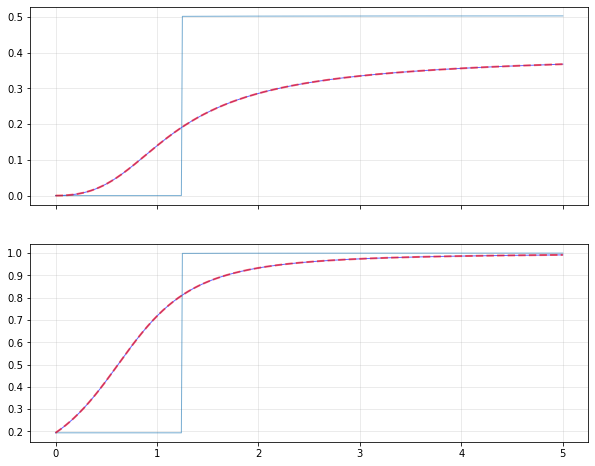

In [120]:
fig1, ax1 = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

ax1[0].plot(mu_list, X_recon_err_lpca_list, c='b', linestyle='-', linewidth=1.0, alpha=0.6)
ax1[0].plot(mu_list, X_recon_err_epca_list, linestyle='-', linewidth=1.0, alpha=0.6)
ax1[0].plot(mu_list, X_recon_err_jpca_list, c='r', linestyle='--', linewidth=2.0, alpha=0.6)
ax1[0].grid(alpha=0.3)
ax1[0].set_axisbelow(True)

ax1[1].plot(mu_list, Y_recon_err_lpca_list, c='b', linestyle='-', linewidth=1.0, alpha=0.6)
ax1[1].plot(mu_list, Y_recon_err_epca_list, linestyle='-', linewidth=1.0, alpha=0.6)
ax1[1].plot(mu_list, Y_recon_err_jpca_list, c='r', linestyle='--', linewidth=2.0, alpha=0.6)
ax1[1].grid(alpha=0.3)
ax1[1].set_axisbelow(True)

plt.show()
